<a href="https://colab.research.google.com/github/u-adrian/PSDA/blob/main/01_Exercise/Aufgabe_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: Random Forest
Hyperparam:
*   Tiefe der Bäume: [1, 2, 4, 8, 16, 32]
*   Anzahl der Bäume: [1, 2, 4, 8, 16, 32]
*   Bagging: [Yes,No]
*   Random split selection: [Yes, No]
*   Criterion: [gini, entropy]

Der Verwendete Datensatz ist der Iris Datensatz. Zu finden hier: [https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html]


In [1]:
!pip install sklearn
random_state = 1

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_diabetes

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dataset = load_iris()

X = dataset.data
y = dataset.target

stratKFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)

forest = RandomForestClassifier(random_state=random_state)

parameters = {'max_depth':[1,2,4,8,16,32], 'n_estimators':[1,2,4,8,16,32], 'bootstrap':[True,False], 'max_features': ['sqrt','log2'], 'criterion':['gini','entropy']}

gscv = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=stratKFold)
gscv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8, 16, 32],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 2, 4, 8, 16, 32]})

In [7]:
import time


cpus = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
deltas = []
for cpu in cpus:
    start = time.time_ns()
    gscv = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=cpu, cv=stratKFold)
    gscv.fit(X, y)
    end = time.time_ns()
    delta = end-start
    deltas.append(delta)
    print(f"time in ns: {delta}")
    
print(deltas)

time in ns: 21161385685
time in ns: 18894562784
time in ns: 19341787342


KeyboardInterrupt: ignored

In [4]:
print(gscv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=8, random_state=1)


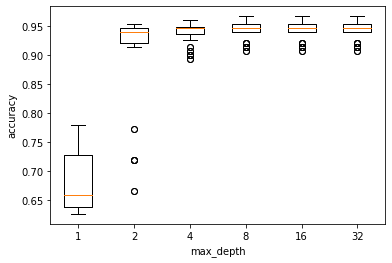

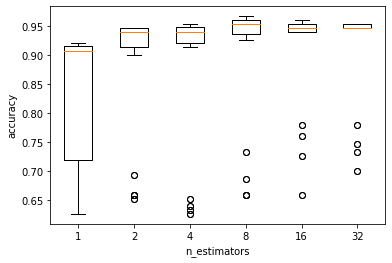

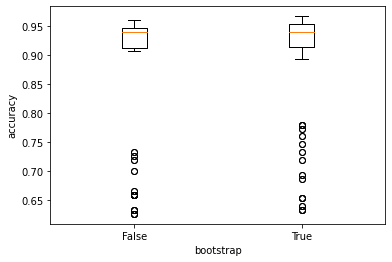

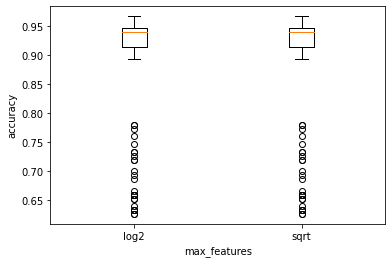

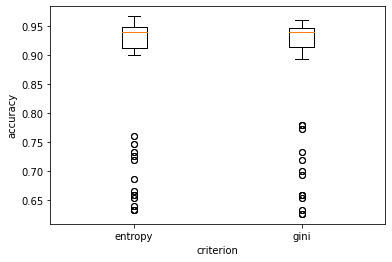

In [5]:
from pandas.core.groupby.groupby import GroupBy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = pd.DataFrame(gscv.cv_results_['params'])
scores = pd.DataFrame(gscv.cv_results_['mean_test_score']).rename(columns={0: 'score'})
dataframe = params.join(scores)
for key in parameters.keys():
  groups = dataframe.groupby([key])
  param_list=[]
  score_list=[]
  #extract data
  for param in groups.groups.keys():
    df=dataframe.iloc[groups.groups[param]]

    scores=np.asarray(df['score'])
    param_list.append(param)
    score_list.append(scores)

  ###plot
  plt.boxplot(score_list,labels=param_list)
  plt.xlabel(key)
  plt.ylabel('accuracy')
  plt.show()

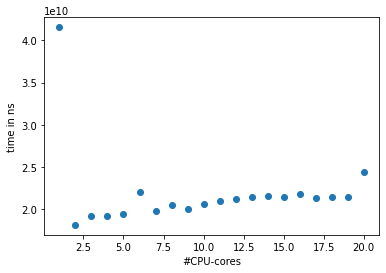

In [6]:
plt.scatter(cpus,y=deltas)
plt.xlabel('#CPU-cores')
plt.ylabel('time in ns')
plt.show()

# Zielmetrik

Wir haben uns in diesem Fall (IRIS Dataset) für die Zielmetrik Accuracy entschieden, da die Klassenwahrscheinlichkeit aller Klassen gleich ist. Außerdem gibt es in diesem Szenario keine starken negativen Auswirkungen durch ein false-negative, anders als beispielsweise bei einer Krebsuntersuchung.